## LGM(LetsGrowMore) 
## Task-1 Iris Flower Classification 
## Data Science Intern

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  DecisionTreeClassifier

In [2]:
#read dataset
df=pd.read_csv("iris_dataset.csv")
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [51]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
df.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [8]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [9]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Figure size 2500x1500 with 0 Axes>

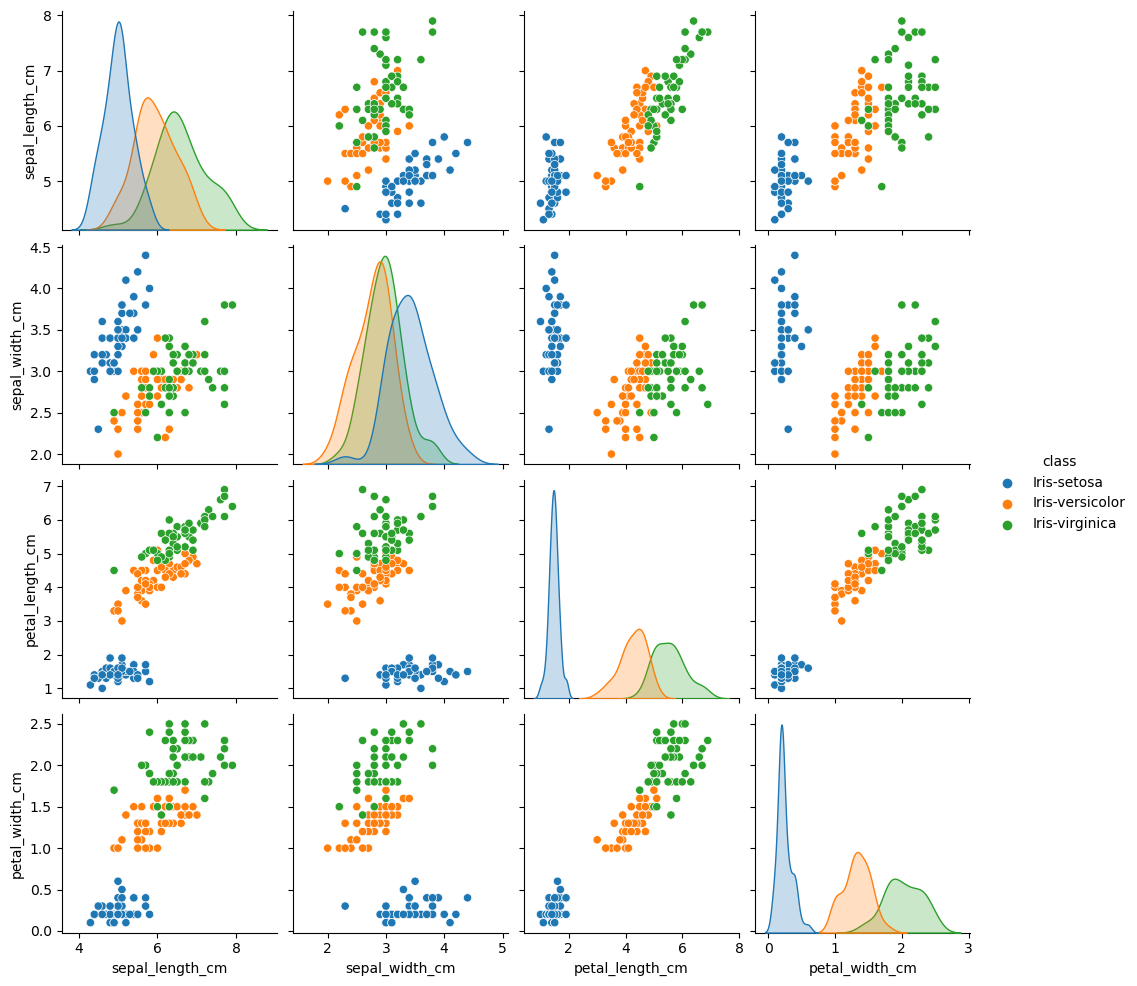

In [14]:
plt.figure(figsize=(25, 15))
sns.pairplot(df,hue='class')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

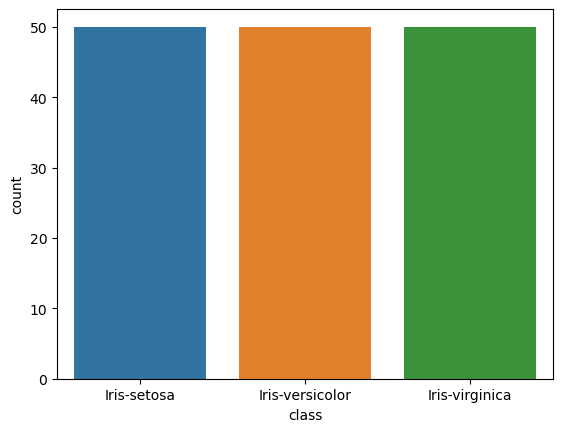

In [16]:
sns.countplot(x="class",data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

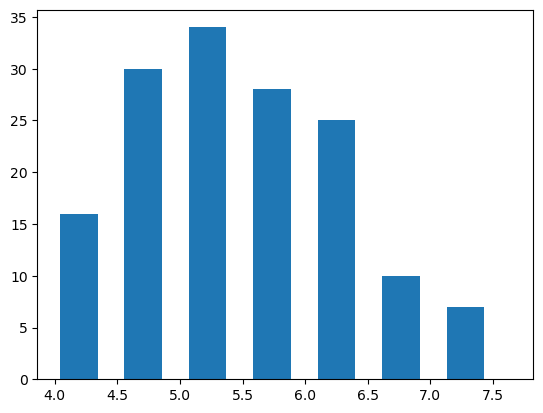

In [17]:
plt.hist(x=df["sepal_length_cm"], bins=7,width=0.3, align='left')
plt.show


(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

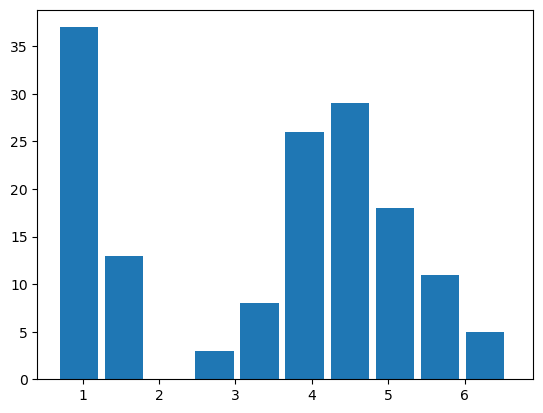

In [18]:
plt.hist(x=df["petal_length_cm"],width=0.5 ,align='left')


<Axes: xlabel='petal_length_cm'>

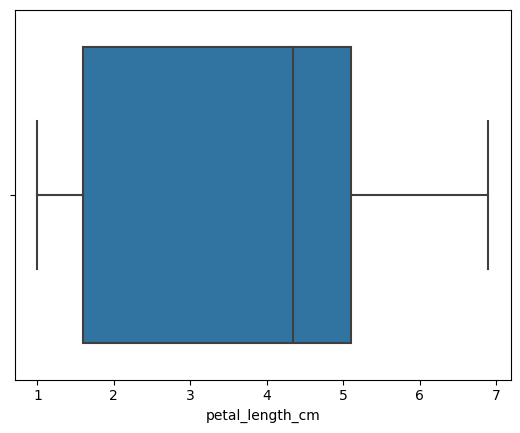

In [19]:
sns.boxplot(x='petal_length_cm',data=df)

<Axes: xlabel='sepal_length_cm'>

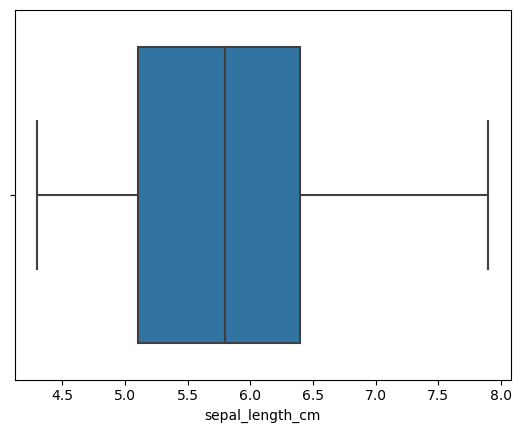

In [20]:
sns.boxplot(x='sepal_length_cm',data=df)

<Axes: xlabel='sepal_width_cm'>

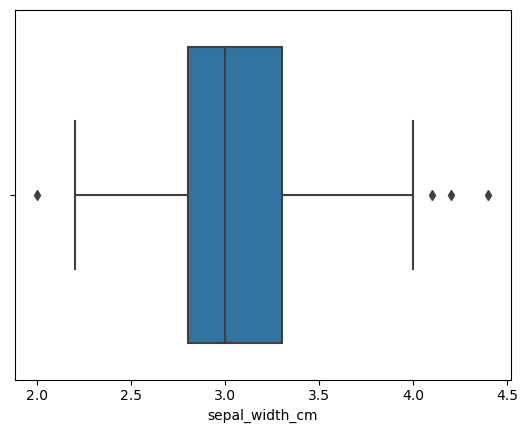

In [21]:
sns.boxplot(x='sepal_width_cm',data=df)

<Axes: xlabel='petal_width_cm'>

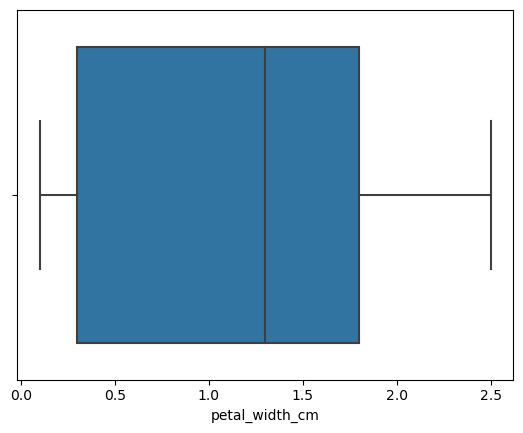

In [22]:
sns.boxplot(x='petal_width_cm',data=df)

In [23]:
#remove outliers from sepal width 
Q1=df.sepal_width_cm.quantile(0.25)
Q3=df.sepal_width_cm.quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(Q1)
print(Q3)

0.5
2.8
3.3


In [25]:
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
newdf = df[(df['sepal_width_cm'] >= lower_bound) & (df['sepal_width_cm'] <= upper_bound)]

print(newdf)

     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
..               ...             ...              ...             ...   
145              6.7             3.0              5.2             2.3   
146              6.3             2.5              5.0             1.9   
147              6.5             3.0              5.2             2.0   
148              6.2             3.4              5.4             2.3   
149              5.9             3.0              5.1             1.8   

              class  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-

<Axes: xlabel='sepal_width_cm'>

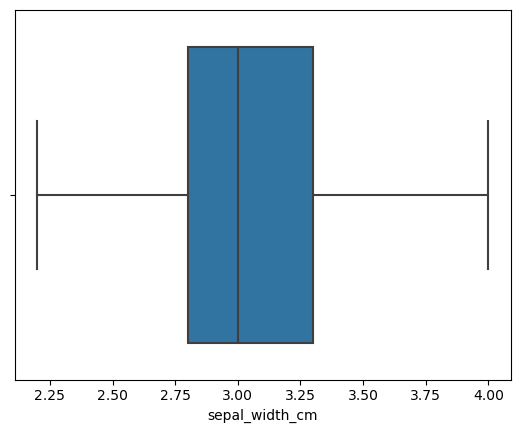

In [26]:
sns.boxplot(x='sepal_width_cm',data=newdf)

In [56]:
df.corr()

C:\Users\ragin\AppData\Local\Temp\ipykernel_17560\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


In [27]:

newdf.replace({'class': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}}, inplace=True)


C:\Users\ragin\AppData\Local\Temp\ipykernel_17560\368319964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.replace({'class': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}}, inplace=True)


In [28]:
newdf['class'].value_counts()

3    50
2    49
1    47
Name: class, dtype: int64

In [52]:
#after remove shape
newdf.shape

(146, 5)

### Split data into train and test

In [54]:
x=newdf.drop('class',axis=1)
y=newdf['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: class, Length: 146, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
ay_pred=rf.predict(x_test)
print(round(accuracy_score(y_test, y_pred),2))

0.9333


In [40]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
# Make predictions on the test data
y_p = clf.predict(x_test)
print(round(accuracy_score(y_test,y_p),2))


0.93


In [57]:
from sklearn.svm import SVC
s = SVC()
s.fit(x_train, y_train)
y_pred = s.predict(x_test)
print(round(accuracy_score(y_pred,y_test),2))


0.97


### SVM gives me best accuracy